In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
raw_train = pd.read_csv('data/train.csv')
raw_test = pd.read_csv('data/test.csv')
raw_train = raw_train.sample(frac=1)

In [3]:
## Reshape and transform to numpy
x_train = raw_train.to_numpy()[:, 1:]/255
y_train = raw_train.to_numpy()[:, 0]
x_train = x_train.reshape((42000, 28, 28, 1))
x_train = x_train.astype('float32')
y_train = y_train.astype('int32')

## Separate data
x_val = x_train[38000:]
y_val = y_train[38000:]
x_train = x_train[:38000]
y_train = y_train[:38000]

x_test = raw_test.to_numpy()/255
x_test = x_test.reshape((28000, 28, 28, 1))
x_test = x_test.astype('float32')

In [4]:
gen =ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(x_train, y_train, batch_size=32)
val_batches = gen.flow(x_val, y_val, batch_size=32)

In [5]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_tensor = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_tensor)

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(generator=batches, steps_per_epoch=len(x_train)//(32*3), validation_data=val_batches, validation_steps=len(x_val)//(32*3), epochs=10)

Epoch 1/10


C:\Users\Adrien.Bouvais\AppData\Local\Temp\ipykernel_44608\1354676553.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


395/395 [==============================] - 14s 33ms/step - loss: 0.1206 - accuracy: 0.9657 - val_loss: 0.0655 - val_accuracy: 0.9809
Epoch 2/10
395/395 [==============================] - 14s 34ms/step - loss: 0.1035 - accuracy: 0.9698 - val_loss: 0.0444 - val_accuracy: 0.9855
Epoch 3/10
395/395 [==============================] - 14s 35ms/step - loss: 0.1069 - accuracy: 0.9682 - val_loss: 0.0517 - val_accuracy: 0.9855
Epoch 4/10
395/395 [==============================] - 13s 34ms/step - loss: 0.1020 - accuracy: 0.9707 - val_loss: 0.0493 - val_accuracy: 0.9840
Epoch 5/10
395/395 [==============================] - 13s 34ms/step - loss: 0.0981 - accuracy: 0.9713 - val_loss: 0.0266 - val_accuracy: 0.9893
Epoch 6/10
395/395 [==============================] - 14s 35ms/step - loss: 0.0909 - accuracy: 0.9714 - val_loss: 0.0690 - val_accuracy: 0.9809
Epoch 7/10
395/395 [==============================] - 14s 36ms/step - loss: 0.0875 - accuracy: 0.9731 - val_loss: 0.0398 - val_accuracy: 0.9855
Epo

In [13]:
results = model.predict(x_test)
sub = []
i=1
for line in results:
    sub.append([i, np.argmax(results[i-1, :])])
    i+=1

df = pd.DataFrame(sub, columns=['ImageId', 'Label'])
df.to_csv('submission.csv', index=False)

875/875 [==============================] - 6s 7ms/step


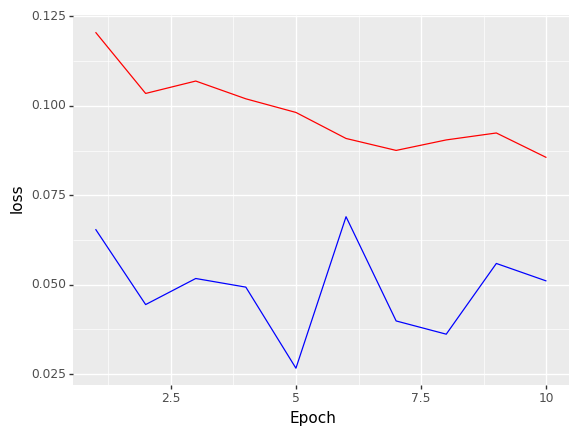

<ggplot: (153479162877)>

In [15]:
from plotnine import ggplot, geom_line, geom_point, aes
hist_df = pd.DataFrame(history.history)
hist_df.insert(0, 'Epoch', range(1, 11))

(
ggplot(hist_df, aes(x='Epoch'))
    + geom_line(aes(y='loss'), color='red')
    + geom_line(aes(y='val_loss'), color='blue')
)

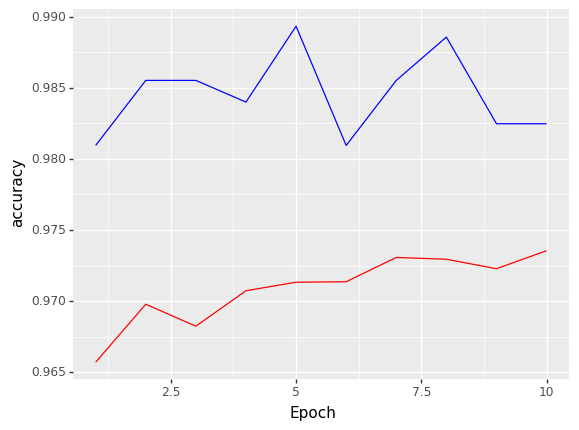

<ggplot: (153434920207)>

In [18]:
(
ggplot(hist_df, aes(x='Epoch'))
    + geom_line(aes(y='accuracy'), color='red')
    + geom_line(aes(y='val_accuracy'), color='blue')
)